階層群聚法(Hierachical clustering)著重在繪製樹狀圖來分類。我們不需事先指定要分幾類。階層群聚可分為以下兩種方法:
1. 凝聚分層集群(aggolomerative hierarchical clustering):先將每個樣本視為一個群集，再將最相近的成對群集合併，直到剩下一個群集

    (1) 單一連結分層集群:對所有集群，找出距離最接近但不同群的兩樣本，並以該距離作為兩群間的距離。接著把距離最短的兩集群合併
    
    (2) 完整連結分層集群:對所有集群，找出距離最遠但不同群的兩樣本，並以該距離作為兩群間的距離。接著把距離最短的兩集群合併
    
2. 分離分層集群(Divisive hierarchical clustering):先將所有樣本視為一個群集，反覆切割成更小的集群值到每個集群都只含一個樣本。

我們將討論重點放在完整連結分層集群。首先先製作一個數據集

In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


完整連結分層集群之演算法如下:
1. 計算所有樣本的距離矩陣
2. 將每個數據點作為一個單一的族群
3. 合併距離最近的集群對
4. 更新相似矩陣
5. 重複步驟2~4直到只剩一個集群

首先先產生距離矩陣

In [2]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [4]:
from scipy.cluster.hierarchy import linkage

# correct approach: Condensed distance matrix
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


這樣就可以畫出樹狀圖了

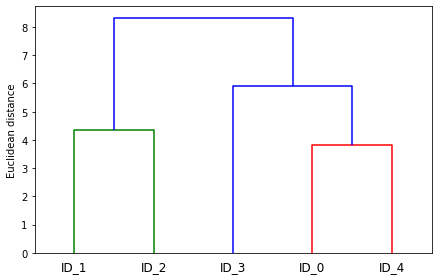

In [7]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

熱度圖繪製，說實在我不知道這是三小

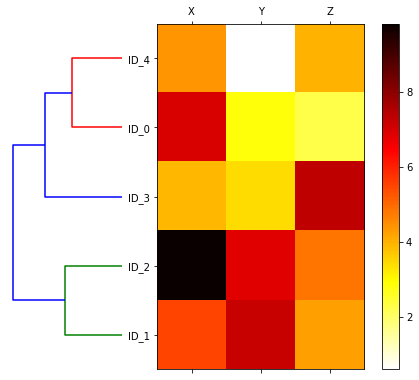

In [8]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

scikit learn也有agglomerativeClustering的實作，我們還可以自行選擇傳回數量。此函數會回傳一個陣列，每個元素是對應的資料所屬的類別。

In [11]:
from sklearn.cluster import AgglomerativeClustering

# 分三群
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

# 分兩群
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]
Cluster labels: [0 1 1 0 0]
